In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from cassandrautils import *


# Weather data

The data is crawled from Open Weather Map

In [2]:
weather = getWeatherDF()
weather.head(5)

,location,forecastdate,description,feels_like,humidity,pressure,sunrise,sunset,temp,temp_max,temp_min,wind
0,Vancouver,2023-12-04 10:46:15,few clouds,276.730011,94.0,1018.0,1701704997,1701735343,279.600006,282.23999,277.75,4.12
1,Vancouver,2023-12-04 10:47:15,few clouds,276.730011,94.0,1018.0,1701704997,1701735343,279.600006,282.23999,277.75,4.12
2,Vancouver,2023-12-04 10:48:15,few clouds,276.730011,94.0,1018.0,1701704997,1701735343,279.600006,282.23999,277.75,4.12
3,Vancouver,2023-12-04 10:49:15,few clouds,276.730011,94.0,1018.0,1701704997,1701735343,279.600006,282.23999,277.75,4.12
4,Vancouver,2023-12-04 10:50:16,few clouds,276.730011,94.0,1018.0,1701704997,1701735343,279.600006,282.23999,277.75,4.12


## The temp is in Kelvin, thus, some modification is needed for the ease of referencing

In [3]:
weather['celsius_temp'] = weather['temp'] - 273.15
weather['celsius_temp_max'] = weather['temp_max'] - 273.15
weather['celsius_temp_min'] = weather['temp_min'] - 273.15

In [4]:
weather['forecastdate_rounded'] = weather['forecastdate'].dt.round("min")

In [5]:
hanoi_weather = weather[weather['location'] == 'Hanoi']
hanoi_weather.head(5)

,location,forecastdate,description,feels_like,humidity,pressure,sunrise,sunset,temp,temp_max,temp_min,wind,celsius_temp,celsius_temp_max,celsius_temp_min,forecastdate_rounded
199,Hanoi,2023-12-04 10:57:02,overcast clouds,293.160004,75.0,1016.0,1701645532,1701684877,293.149994,293.149994,293.149994,2.47,19.999994,19.999994,19.999994,2023-12-04 10:57:00
200,Hanoi,2023-12-04 10:58:09,overcast clouds,293.160004,75.0,1016.0,1701645532,1701684877,293.149994,293.149994,293.149994,2.47,19.999994,19.999994,19.999994,2023-12-04 10:58:00
201,Hanoi,2023-12-04 10:59:09,overcast clouds,293.160004,75.0,1016.0,1701645532,1701684877,293.149994,293.149994,293.149994,2.47,19.999994,19.999994,19.999994,2023-12-04 10:59:00
202,Hanoi,2023-12-04 11:00:10,overcast clouds,293.160004,75.0,1016.0,1701645532,1701684877,293.149994,293.149994,293.149994,2.47,19.999994,19.999994,19.999994,2023-12-04 11:00:00
203,Hanoi,2023-12-04 11:01:10,overcast clouds,293.160004,75.0,1016.0,1701645532,1701684877,293.149994,293.149994,293.149994,2.47,19.999994,19.999994,19.999994,2023-12-04 11:01:00


In [6]:
paris_weather = weather[weather['location'] == 'Paris']
paris_weather.head(5)

,location,forecastdate,description,feels_like,humidity,pressure,sunrise,sunset,temp,temp_max,temp_min,wind,celsius_temp,celsius_temp_max,celsius_temp_min,forecastdate_rounded
11,Paris,2023-12-04 10:56:32,broken clouds,274.98999,93.0,1000.0,1701674762,1701705338,278.950012,279.920013,277.579987,6.17,5.800012,6.770013,4.429987,2023-12-04 10:57:00
12,Paris,2023-12-04 10:57:39,broken clouds,274.98999,93.0,1000.0,1701674762,1701705338,278.950012,279.920013,277.579987,6.17,5.800012,6.770013,4.429987,2023-12-04 10:58:00
13,Paris,2023-12-04 10:58:39,broken clouds,274.98999,93.0,1000.0,1701674762,1701705338,278.950012,279.920013,277.579987,6.17,5.800012,6.770013,4.429987,2023-12-04 10:59:00
14,Paris,2023-12-04 10:59:40,broken clouds,274.98999,93.0,1000.0,1701674762,1701705338,278.950012,279.920013,277.579987,6.17,5.800012,6.770013,4.429987,2023-12-04 11:00:00
15,Paris,2023-12-04 11:00:40,broken clouds,274.98999,93.0,1000.0,1701674762,1701705338,278.950012,279.920013,277.579987,6.17,5.800012,6.770013,4.429987,2023-12-04 11:01:00


# Faker data

Due to the data is randomly generated, the data distribution is uneven, sometimes it does not even makes sense. This shows that the data is truly randomly computer generated.

In [7]:
faker_data = getFakerDF() 

fakerdata


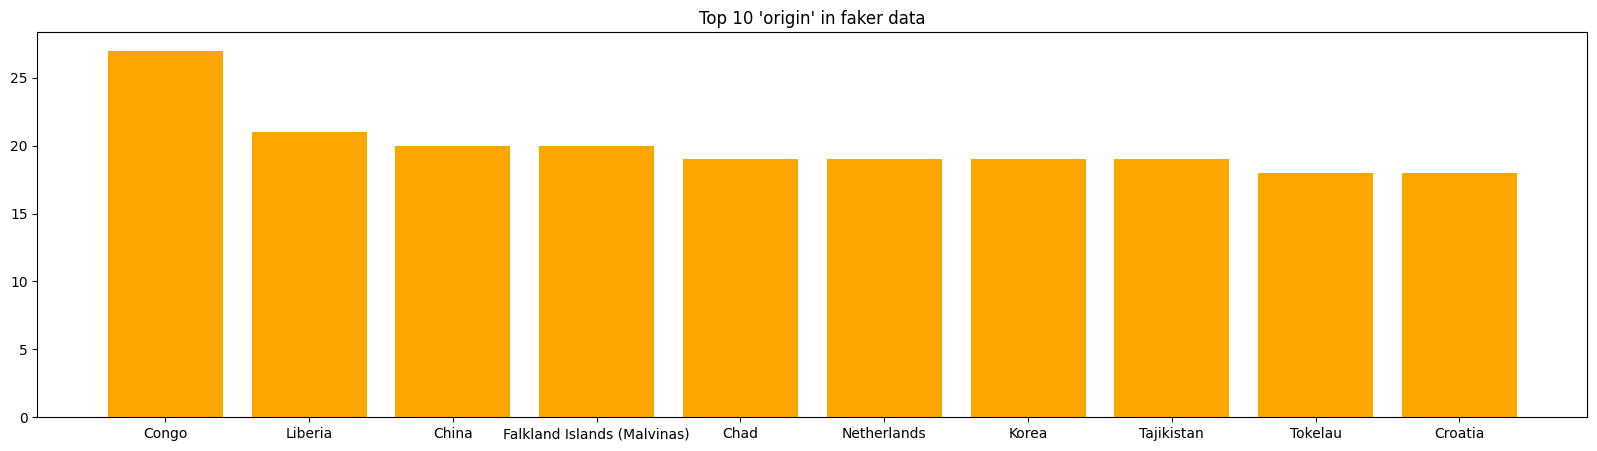

In [8]:
plt.figure(figsize=(20,5))
plt.title("Top")
origin_top_10 = faker_data.groupby(['origin']).size().to_frame().sort_values([0], ascending = False).head(10).reset_index()
plt.bar(origin_top_10['origin'], origin_top_10[0], color='orange')
plt.title("Top 10 'origin' in faker data")
plt.show()

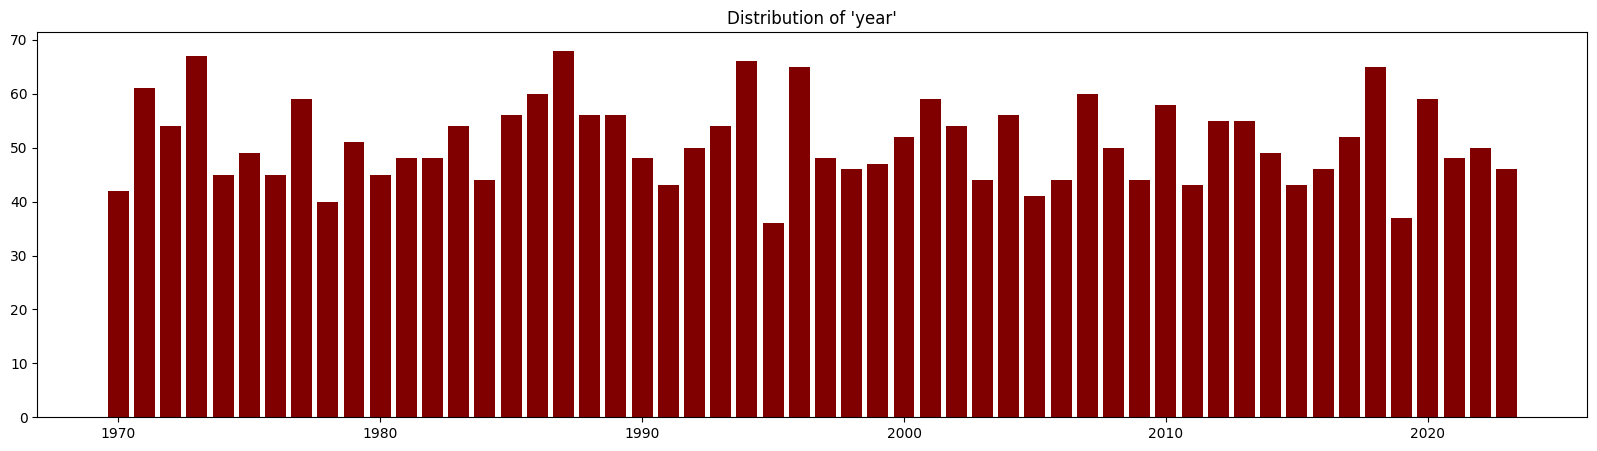

In [9]:
plt.figure(figsize=(20,5))
year_hist = faker_data.groupby(['year']).size().to_frame().sort_values([0], ascending = False).reset_index()
plt.bar(year_hist['year'], year_hist[0], color='maroon')
plt.title("Distribution of 'year'")
plt.show()

In [10]:
dof_df = faker_data.copy()
dof_df['date_of_birth'] = pd.to_datetime(dof_df['date_of_birth'], format='%m/%d/%Y')
dof_df['date_of_birth'].head(5)

0   1981-03-15
1   1939-10-24
2   1931-06-21
3   1914-06-16
4   1960-05-09
Name: date_of_birth, dtype: datetime64[ns]

In [11]:
dof_df['year_column'] = dof_df['date_of_birth'].dt.year
dof_df['mon_column'] = dof_df['date_of_birth'].dt.month

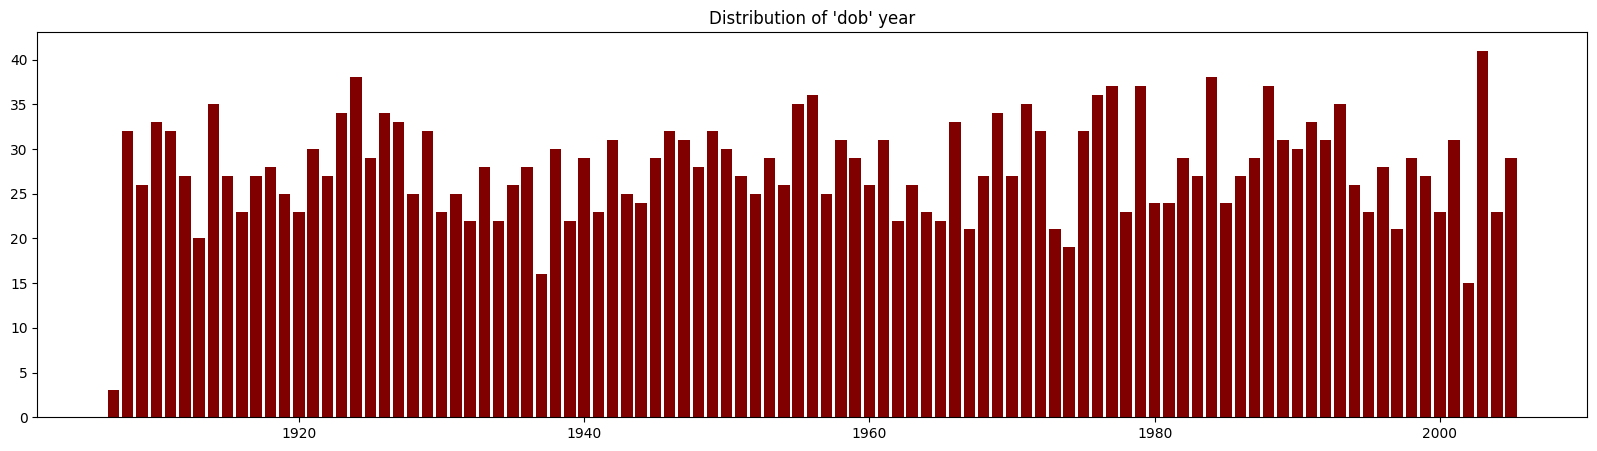

In [12]:
plt.figure(figsize=(20,5))
dof_hist = dof_df.groupby(['year_column']).size().to_frame().sort_values([0], ascending = False).reset_index()
plt.bar(dof_hist['year_column'], dof_hist[0], color='maroon')
plt.title("Distribution of 'dob' year")
plt.show()

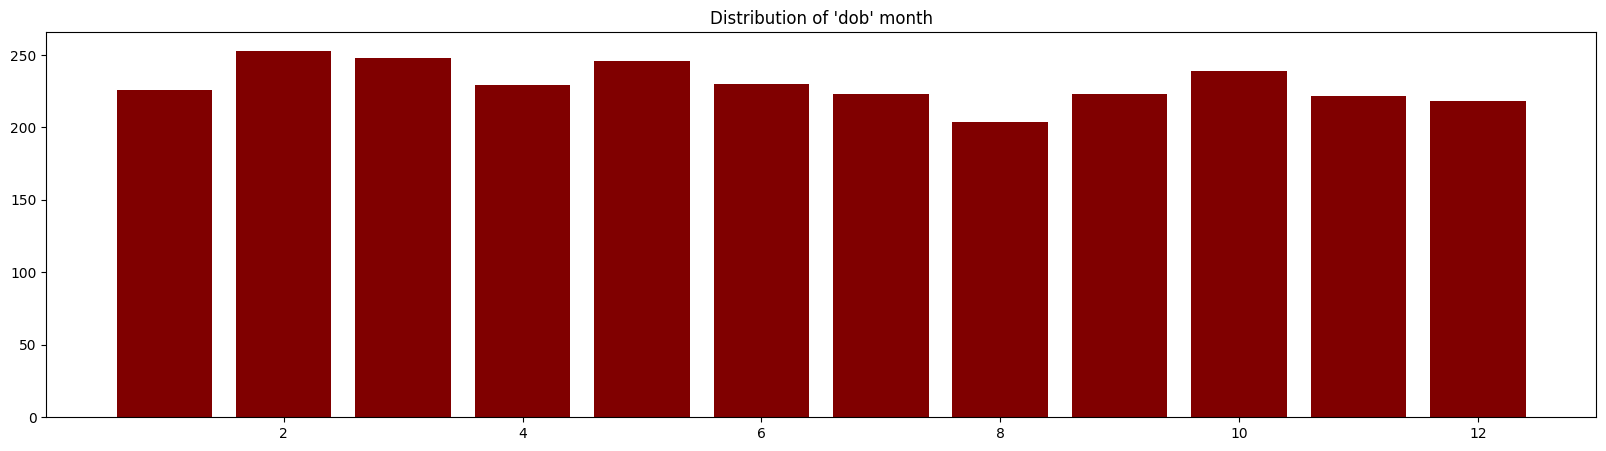

In [13]:
plt.figure(figsize=(20,5))
dof_mon_hist = dof_df.groupby(['mon_column']).size().to_frame().sort_values([0], ascending = False).reset_index()
plt.bar(dof_mon_hist['mon_column'], dof_mon_hist[0], color='maroon')
plt.title("Distribution of 'dob' month")
plt.show()

# AQI Data

In [14]:
aqi = getAqiDF()
aqi_rounded = aqi.copy()
aqi_rounded["time"] = aqi["time"].dt.round("min")
aqi_rounded.head(5)

aqi


,location,time,aqi
0,paris,2023-12-04 14:04:00,45.0
1,paris,2023-12-04 14:04:00,45.0
2,paris,2023-12-04 14:04:00,45.0
3,paris,2023-12-04 14:04:00,45.0
4,paris,2023-12-04 14:04:00,45.0


In [15]:
hanoi_aqi = aqi_rounded[aqi_rounded['location'] == "hanoi"]
paris_aqi = aqi_rounded[aqi_rounded['location'] == "paris"]

In [16]:
hanoi_aqi.head(5)

,location,time,aqi
541,hanoi,2023-12-04 14:04:00,137.0
542,hanoi,2023-12-04 14:04:00,137.0
543,hanoi,2023-12-04 14:04:00,137.0
544,hanoi,2023-12-04 14:04:00,137.0
545,hanoi,2023-12-04 14:04:00,137.0


In [17]:
paris_aqi.head(5)

,location,time,aqi
0,paris,2023-12-04 14:04:00,45.0
1,paris,2023-12-04 14:04:00,45.0
2,paris,2023-12-04 14:04:00,45.0
3,paris,2023-12-04 14:04:00,45.0
4,paris,2023-12-04 14:04:00,45.0


In [18]:
hanoi_aqi_temp = pd.merge(hanoi_aqi, hanoi_weather, left_on='time', right_on='forecastdate_rounded', how='left').drop('forecastdate_rounded', axis=1).drop('location_x', axis=1)
hanoi_aqi_temp_not_null = hanoi_aqi_temp.dropna()
hanoi_aqi_temp_not_null.head(2)

,time,aqi,location_y,forecastdate,description,feels_like,humidity,pressure,sunrise,sunset,temp,temp_max,temp_min,wind,celsius_temp,celsius_temp_max,celsius_temp_min
0,2023-12-04 14:04:00,137.0,Hanoi,2023-12-04 14:04:01,overcast clouds,292.01001,73.0,1017.0,1.701646e+09,1.701685e+09,292.149994,292.149994,292.149994,1.81,18.999994,18.999994,18.999994
1,2023-12-04 14:04:00,137.0,Hanoi,2023-12-04 14:04:01,overcast clouds,292.01001,73.0,1017.0,1.701646e+09,1.701685e+09,292.149994,292.149994,292.149994,1.81,18.999994,18.999994,18.999994


In [19]:
paris_aqi_temp = pd.merge(paris_aqi, paris_weather, left_on='time', right_on='forecastdate_rounded', how='left').drop('forecastdate_rounded', axis=1).drop('location_x', axis=1)
paris_aqi_temp_not_null = paris_aqi_temp.dropna()
paris_aqi_temp_not_null.head(2)

,time,aqi,location_y,forecastdate,description,feels_like,humidity,pressure,sunrise,sunset,temp,temp_max,temp_min,wind,celsius_temp,celsius_temp_max,celsius_temp_min
0,2023-12-04 14:04:00,45.0,Paris,2023-12-04 14:03:31,moderate rain,279.079987,85.0,997.0,1.701675e+09,1.701705e+09,282.290009,282.920013,281.480011,6.69,9.140009,9.770013,8.330011
1,2023-12-04 14:04:00,45.0,Paris,2023-12-04 14:03:31,moderate rain,279.079987,85.0,997.0,1.701675e+09,1.701705e+09,282.290009,282.920013,281.480011,6.69,9.140009,9.770013,8.330011


# DATA VISUALIZATION

## WEATHER DATA

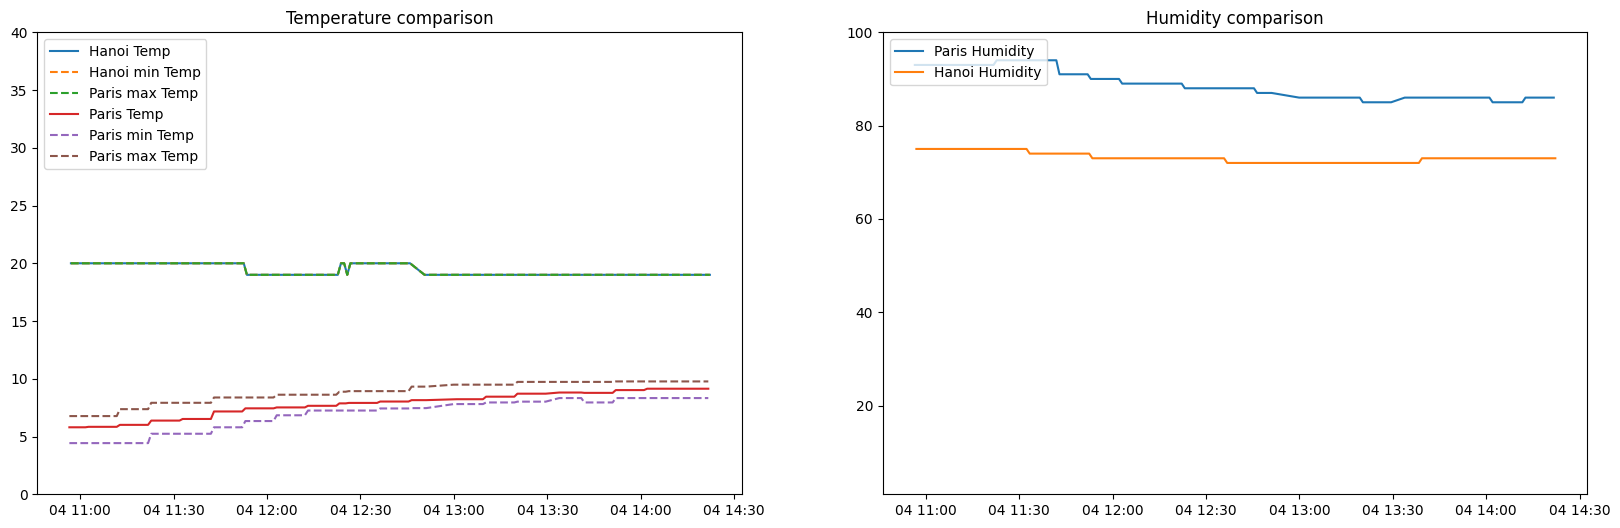

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax = ax.flatten()


ax[0].plot(hanoi_weather['forecastdate'], hanoi_weather['celsius_temp'], label="Hanoi Temp")
ax[0].plot(hanoi_weather['forecastdate'], hanoi_weather['celsius_temp_min'], '--',label="Hanoi min Temp")
ax[0].plot(hanoi_weather['forecastdate'], hanoi_weather['celsius_temp_max'], '--',label="Paris max Temp")

ax[0].plot(paris_weather['forecastdate'], paris_weather['celsius_temp'], label="Paris Temp") 
ax[0].plot(paris_weather['forecastdate'], paris_weather['celsius_temp_min'], '--',label="Paris min Temp")
ax[0].plot(paris_weather['forecastdate'], paris_weather['celsius_temp_max'], '--',label="Paris max Temp")

ax[0].set_ylim(0, 40)
ax[0].set_title("Temperature comparison")

ax[0].legend(loc="upper left")

ax[1].plot(paris_weather['forecastdate'], paris_weather['humidity'], label="Paris Humidity")
ax[1].plot(hanoi_weather['forecastdate'], hanoi_weather['humidity'], label="Hanoi Humidity")
ax[1].legend(loc="upper left")

ax[1].set_ylim(1, 100)
ax[1].set_title("Humidity comparison")

fig.show()

## WEATHER - AQI DATA

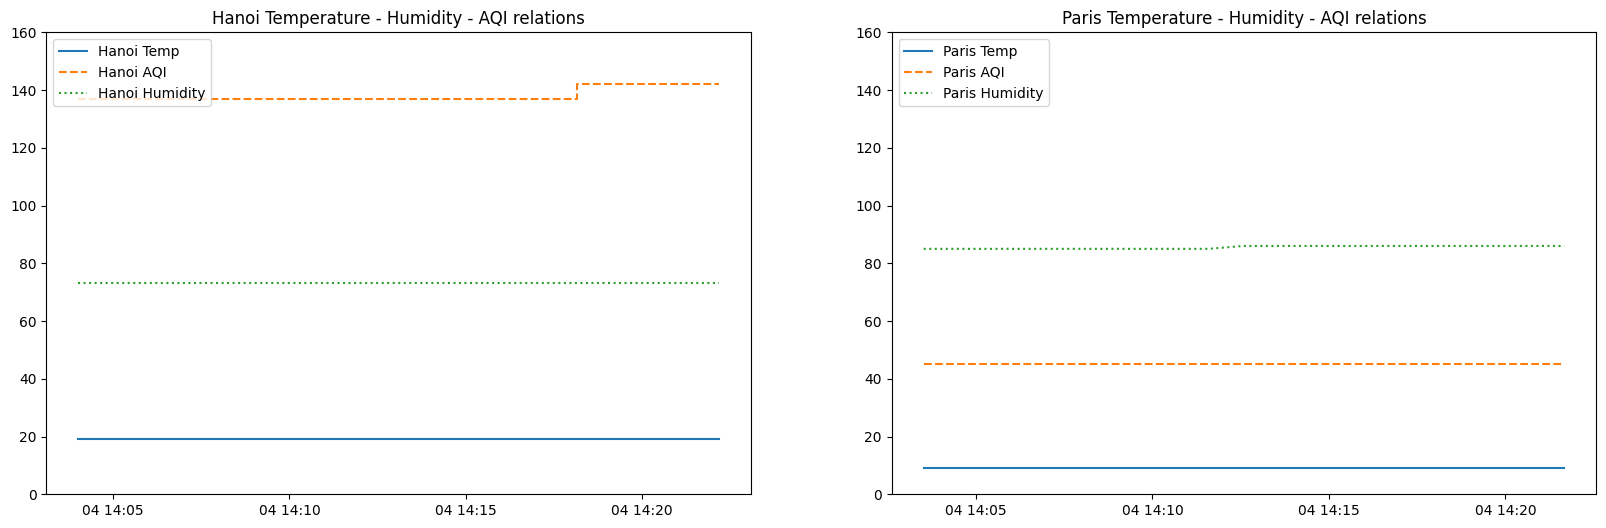

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax = ax.flatten()

# hanoi
ax[0].plot(hanoi_aqi_temp_not_null['forecastdate'], hanoi_aqi_temp_not_null['celsius_temp'], label="Hanoi Temp")
ax[0].plot(hanoi_aqi_temp_not_null['forecastdate'], hanoi_aqi_temp_not_null['aqi'], '--',label="Hanoi AQI")
ax[0].plot(hanoi_aqi_temp_not_null['forecastdate'], hanoi_aqi_temp_not_null['humidity'], ':',label="Hanoi Humidity")

ax[0].legend(loc="upper left")
ax[0].set_title("Hanoi Temperature - Humidity - AQI relations")
ax[0].set_ylim(0, 160)

# Paris
ax[1].plot(paris_aqi_temp_not_null['forecastdate'], paris_aqi_temp_not_null['celsius_temp'], label="Paris Temp")
ax[1].plot(paris_aqi_temp_not_null['forecastdate'], paris_aqi_temp_not_null['aqi'], '--',label="Paris AQI")
ax[1].plot(paris_aqi_temp_not_null['forecastdate'], paris_aqi_temp_not_null['humidity'], ':',label="Paris Humidity")

ax[1].legend(loc="upper left")
ax[1].set_title("Paris Temperature - Humidity - AQI relations")
ax[1].set_ylim(0, 160)

plt.show()